NameError: name 'np' is not defined

$$Y_i | \mu \approx N(\mu,1)$$
$$ \mu \approx cachy \ \ \left(\frac{1}{\pi(1+\mu^2)} \right)$$

정규분포를 따르는 $Y_i$ 를 관찰하고 난 뒤의 $\mu$ 에 대한 posterior를 구하라     
      
$$P(\mu | Y_1, Y_2, ...  Y_n) \  \ \sim  \  \ P(Y_1, Y_2, ...  Y_n| \mu) \times  P(\mu)$$    
$$ {\prod^N}_{i=1}  \left( \frac{1}{\sqrt{2 \pi}} exp\left[ - \frac{(Y_i - \mu)^2}{2} \right]\right) \ \ \times \left(\frac{1}{\pi(1+\mu^2)} \right)$$          

$$ \approx exp \left[ - \frac{1}{2} \sum(y_i - \mu)^2 \right] \ \ \times \left(\frac{1}{\pi(1+\mu^2)} \right)$$     

$$
\approx \frac{exp \left[n(\mu \overline{y} - \frac{\mu^2}{2}) \right]}{1+ \mu^2}
$$                       


거의 정규분포의 kernel이 될 뻔 했지만, 확률변수의 제곱꼴이 분모형태로 있어서 더 이상 계산을 전개할 수 없다. 알 수 없는 분포이다. 
따라서 ###nonConjugate

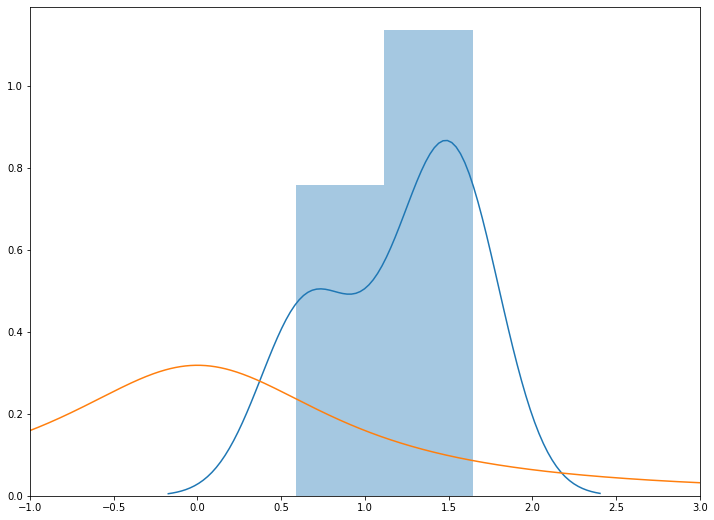

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import cauchy
shape = 6
scale = 1/5
observed_data = np.random.gamma(shape, scale, 10)
x = linspace(-2, 4, 1000)

plt.figure(figsize=(12,9))
sns.distplot(observed_data)
plt.xlim(-1, 3)
plt.plot(x, cauchy.pdf(x))
plt.xlim(-1, 3)

plt.show()

### Metropolis Hasting 

#### 알고리즘

1. 임의로 시작 값을 고른다. $\mu_0$   
2. For i = 1, 2, 3, .... , n :     
    a. 다음 후보가될 ($\mu^*$) 를 proposal distribution ( $q(\mu^* | \mu_{i-1})$ ) 에서 추출한다.      
    b. 추출된 후보 ($\mu^*$) 와 현재의 $\mu_{i-1}$ 간의 ration를 계산한다.        
    c. 이 때, ratio는 다음과 같이 구한다.    
    $$
    \alpha = \frac{g(\mu^*) \ \ q(\mu_{i-1} | (\mu^*)}{g(\mu_{i-1}) \ \ q(\mu^* |\mu_{i-1} )}
    $$     
    d. $\alpha >= 1$ 이면 후보인($\mu^*$)를 채택한다      
    $$ \mu_i = \mu^* $$     
    e. $0 < \alpha < 1$ 이면, $\alpha$ 의 확률로 ( $\mu^*$ )를 채택한다.  $ \mu_i = \mu^* $     
    f.  $0 < \alpha < 1$ 이면, $1-\alpha$ 의 확률로 sampling을 하지 않는다. $ \mu_i = \mu_{i-1}$


$log(g(u)) = n( \overline{y} \mu - \mu^2)-log(1+ \mu^2)$ 

In [168]:
def logGfunc(mu, n, ybar):
    return n * (ybar*mu - mu**2/2) - np.log(1+mu**2)

In [169]:
from scipy.stats import beta, gamma
from numpy import linspace, exp

def mh(n, ybar, n_iter, mu_zero, sd):
    accept =0 
    mu_now = mu_zero
    logG_now = logGfunc(mu_now, n, ybar)
    sampled_muList = []
    for idx in range(n_iter):
        mu_candidate = np.random.normal(mu_now, sd, 1)
        logG_candidate = logGfunc(mu_candidate, n, ybar)
        
        logAlpha = logG_candidate - logG_now
        alpha = np.exp(logAlpha)
        
        if 1 < alpha:
            mu_now = mu_candidate
            accept = accept+1
            logG_now = logG_candidate
            sampled_muList.append(mu_now)
        else:
            d = np.random.binomial(1,alpha,1)
            if d[0] == 1:
                mu_now = mu_candidate
                accept = accept+1
                logG_now = logG_candidate
                sampled_muList.append(mu_now)
            
        
    return sampled_muList, accept/n_iter
        

In [170]:
import numpy as np
meanY = np.mean(observed_data)
simulted, ratio = mh(10, meanY, 1000, 3, 0.9)

In [171]:
ratio

0.384

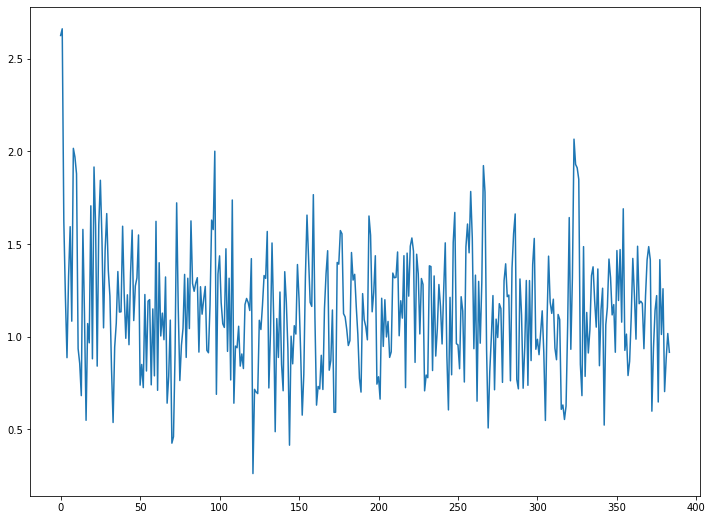

In [172]:
plt.figure(figsize=(12,9))
plt.plot(simulted)
plt.show()

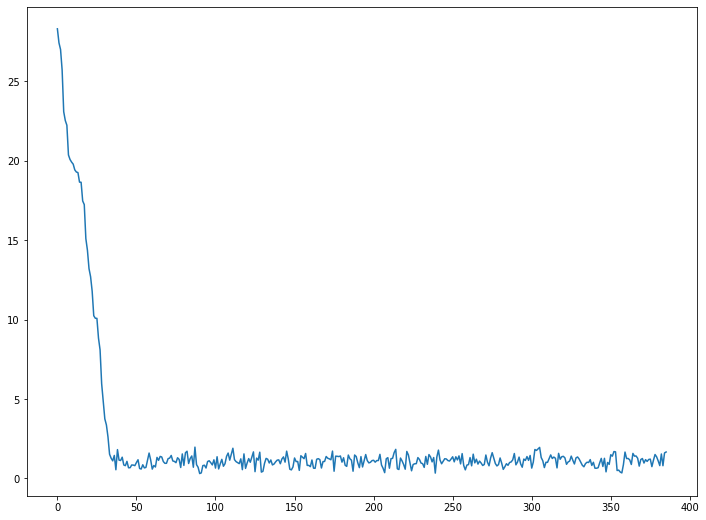

In [174]:
simulated, ratio = mh(10, meanY, 1000, 30, 0.9)
plt.figure(figsize=(12,9))
plt.plot(simulated)
plt.show()

In [155]:
simulted[-2]

array([1.06471146])

In [156]:
np.mean(simulted)

1.1213653709145066

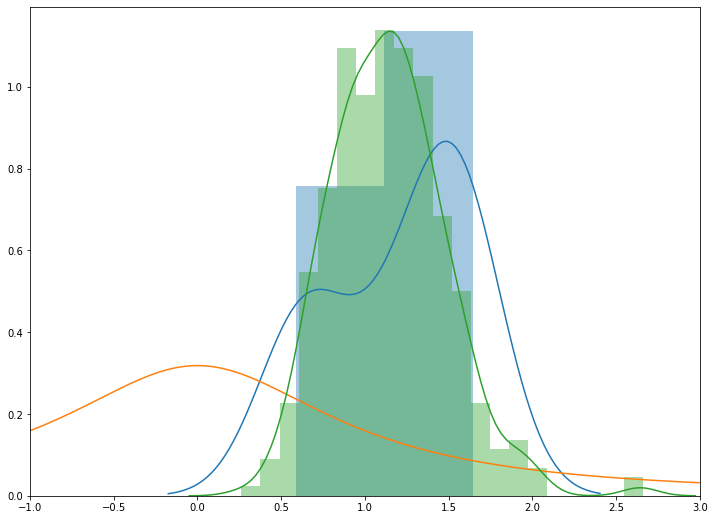

In [173]:
plt.figure(figsize=(12,9))
sns.distplot(observed_data)
plt.xlim(-1, 3)
plt.plot(x, cauchy.pdf(x))
plt.xlim(-1, 3)

sns.distplot(simulted)
plt.xlim(-1, 3)
plt.show()

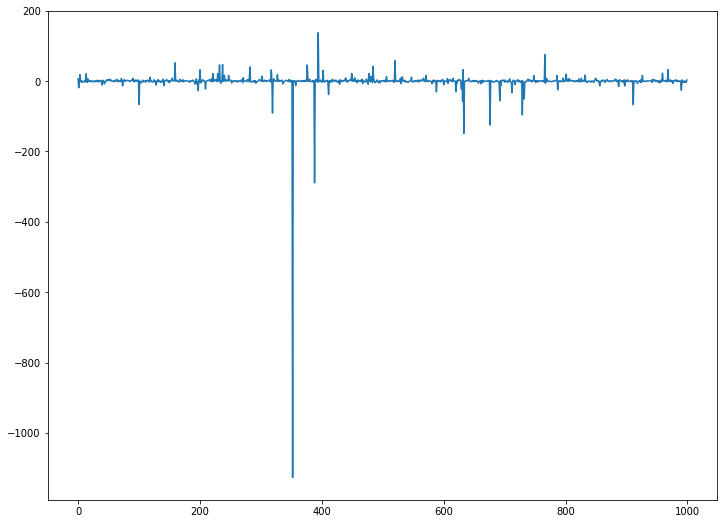

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
muList = np.random.standard_cauchy(1000)
dataList=[]
for mu in muList:
    dataList.append(np.random.normal(mu,1,1)[0])

    

plt.figure(figsize=(12,9))    
plt.plot(dataList)
plt.show()

In [18]:
np.random.normal(mu,1,1)[0]

1.0113748807151821

In [ ]:
dataList.